In [64]:
from stobeLoader import load_data

In [65]:
dft_data_folder = "../../dft/polystyrene_rotated/packaged_output"

width1 = 0.6 / 2.355
width2 = 12 / 2.355
max_energy = 320

# load_data
data = load_data(
    directory=dft_data_folder,
    width1=width1,
    width2=width2,
    max_energy=max_energy,
    maxRot=4,
    verbose=True,
    n_jobs=1
)

if data is not None:
    # Access the different dataframes
    energy_results = data['energy_results']
    xray_transitions = data['xray_transitions']
    orbital_alpha = data['orbital_alpha']
    orbital_beta = data['orbital_beta']
    atomic_coordinates = data['atomic_coordinates']
    basis_sets = data['basis_sets']
else:
    print("Failed to load data")

Processing directory: ../../dft/polystyrene_rotated/packaged_output
Using maxRot = 4 for TDM tensor calculation
Total files to process: 18
Processing: 55.6% completed (10/18)
Available energy columns: ['Atom', 'GND_Total energy (H)', 'GND_Nuc-nuc energy (H)', 'GND_El-nuc energy (H)', 'GND_Kinetic energy (H)', 'GND_Coulomb energy (H)', 'GND_Ex-cor energy (H)', 'GND_Originating File', 'EXC_Total energy (H)', 'EXC_Nuc-nuc energy (H)', 'EXC_El-nuc energy (H)', 'EXC_Kinetic energy (H)', 'EXC_Coulomb energy (H)', 'EXC_Ex-cor energy (H)', 'EXC_Originating File', 'TP_Total energy (H)', 'TP_Nuc-nuc energy (H)', 'TP_El-nuc energy (H)', 'TP_Kinetic energy (H)', 'TP_Coulomb energy (H)', 'TP_Ex-cor energy (H)', 'TP_Orbital energy core hole (H)', 'TP_Orbital energy core hole (eV)', 'TP_Rigid spectral shift (eV)', 'TP_Ionization potential (eV)', 'TP_LUMO_En', 'TP_Originating File', 'Energy_Correction (eV)']
Applying Energy Corrections
Applied correction of -3.1113 eV to 327 transitions for atom C8
Ap

In [66]:
xray_transitions.to_csv("xray_transitions_rotated.csv")
energy_results.to_csv("energy_results_rotated.csv")

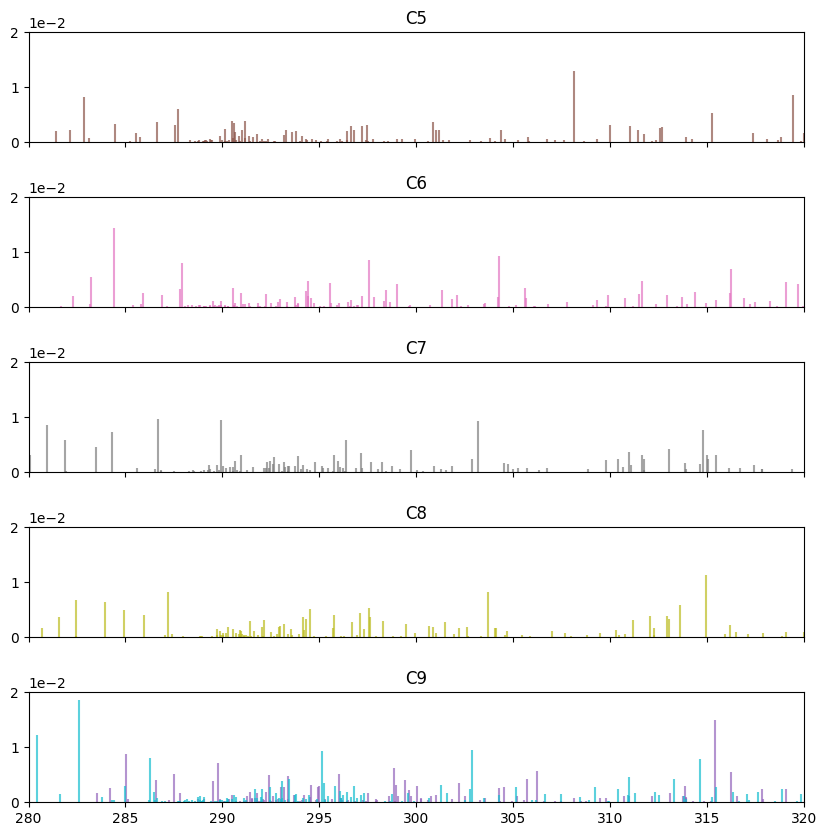

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=5, sharex=True, gridspec_kw={'hspace': 0.5}, figsize=(10, 10))
for _, row in xray_transitions.iterrows():
    # Grab only C4-9
    idx = int(row['Atom'].split("C")[1])-1 - 4
    ax[idx].vlines(row['E'], 0, row['OS'], color=row['Atom'], alpha=0.7)
    ax[idx].set_xlim(280, 320)
    ax[idx].set_ylim(0, 0.02)
    ax[idx].set_title(f"{row['Atom']}")
    # Use scientific notation for the y-axis
    ax[idx].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

In [68]:
from nexafs_analyzer import NEXAFSAnalyzer

data_path = "xray_transitions_rotated.csv"
df_step_path = "dft_step_data_rotated.csv"

analyzer = NEXAFSAnalyzer(data_path)
clustering = analyzer.run_complete_analysis(
    os_threshold_percent=1,
    overlap_threshold=55,
    compound_dict={'C':10, "H": 7, "Cl":1},
    dft_step_data_path=df_step_path
)

STEP 1: PREPROCESSING
Original data: 1961 transitions
After energy filter (E <= 320): 1059 transitions
After 1% OS threshold: 670 transitions

STEP 2: ITERATIVE CLUSTERING ANALYSIS
Starting iterative analysis with 670 initial peaks
Overlap threshold: 55%
Method: skip_tolerant

Iteration 1:
Input peaks: 670
Calculating overlap matrix for 670 peaks...
Overlap matrix calculated: (670, 670)
Maximum off-diagonal overlap: 100.0%
Clustering 670 peaks with skip_tolerant method...
Overlap threshold: 55%
Skip tolerance: 1 peaks
Created 32 clusters
Cluster sizes: min=2, max=61, avg=20.9
Found tensor component columns: ['xx', 'xy', 'xz', 'yx', 'yy', 'yz', 'zx', 'zy', 'zz']
Fitting Gaussians for 32 clusters...
Successfully fitted 32 out of 32 clusters
Aggregated tensor components: ['xx', 'xy', 'xz', 'yx', 'yy', 'yz', 'zx', 'zy', 'zz']
  xx: 1103.003032 → 1103.003032 (conservation check)
  xy: -83.334316 → -83.334316 (conservation check)
  xz: 0.000000 → 0.000000 (conservation check)
  yx: -83.33431

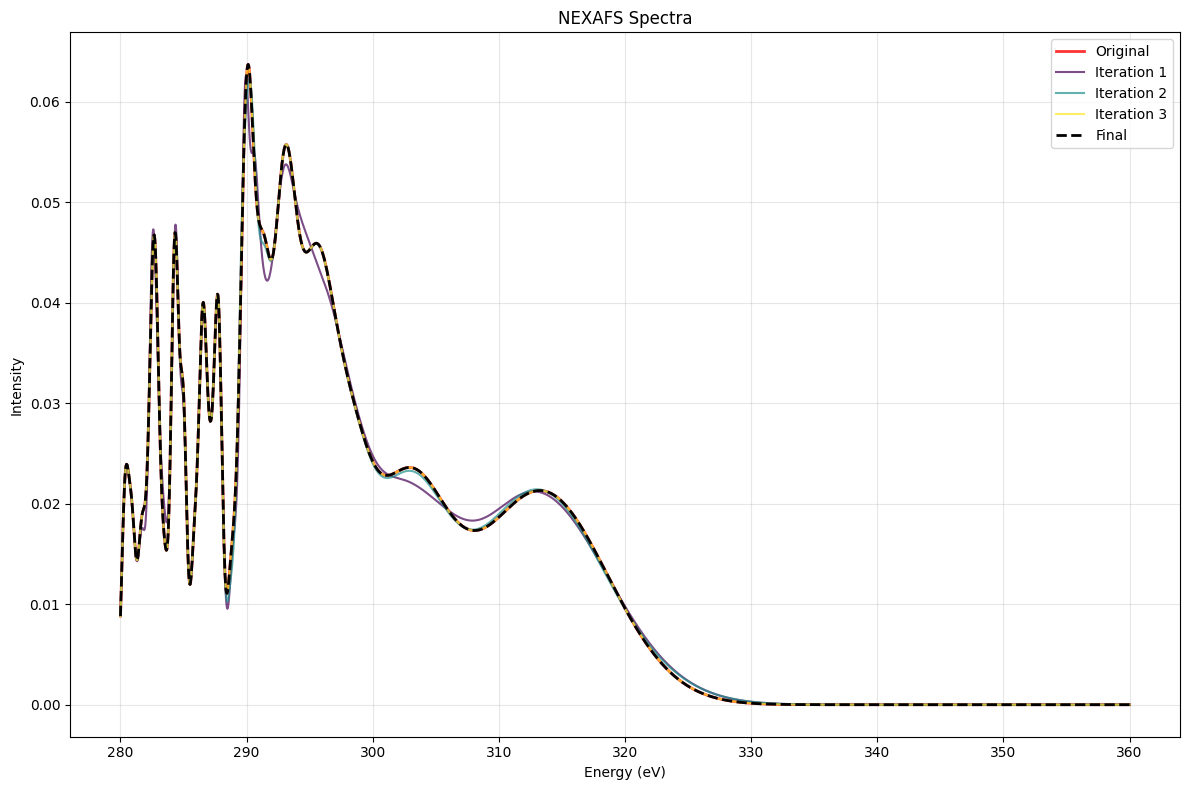

In [69]:
from plotUtils import plot_iteration_nexafs

plot_iteration_nexafs(clustering, 'all')

In [70]:
def display_leaf_values(d, path=None):
    """
    Recursively display the path and value for each non-dictionary leaf node in a nested dictionary.
    Prints: path: value
    """
    if path is None:
        path = []
    if isinstance(d, dict):
        for k, v in d.items():
            display_leaf_values(v, path + [str(k)])
    else:
        print(" -> ".join(path) + ":")
        display(d)

display_leaf_values(clustering)

preprocessing -> df_raw:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,Applied_Correction,xx,xy,xz,yx,yy,yz,zx,zy,zz
0,0,C8,C8tp.out,1.0,280.692323,0.001679,-0.000000,-0.000000,0.015541,0.0000,...,-3.111277,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
1,1,C8,C8tp.out,2.0,281.546523,0.003634,0.022492,-0.003901,0.000000,0.0001,...,-3.111277,3.883189,-0.673498,0.0,-0.673498,0.116811,0.0,0.0,0.0,0.0
2,2,C8,C8tp.out,3.0,282.428223,0.000143,-0.003647,-0.002677,-0.000000,0.0000,...,-3.111277,2.599433,1.908057,0.0,1.908057,1.400567,0.0,0.0,0.0,0.0
3,3,C8,C8tp.out,4.0,282.432523,0.006693,-0.000000,-0.000000,0.030931,0.0000,...,-3.111277,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
4,4,C8,C8tp.out,5.0,283.958123,0.006489,0.000000,-0.000000,-0.030374,0.0000,...,-3.111277,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,C7,C7tp.out,323.0,1164.795054,0.045364,-0.000000,-0.000000,0.039816,0.0000,...,-3.218746,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
1957,1957,C7,C7tp.out,324.0,1164.813854,0.045391,0.032280,0.023329,0.000000,0.0000,...,-3.218746,2.627592,1.898981,0.0,1.898981,1.372408,0.0,0.0,0.0,0.0
1958,1958,C7,C7tp.out,325.0,1166.785254,0.045148,-0.023241,0.032170,0.000000,0.0000,...,-3.218746,1.371748,-1.898763,0.0,-1.898763,2.628252,0.0,0.0,0.0,0.0
1959,1959,C7,C7tp.out,326.0,1311.516754,0.000008,-0.000250,0.000420,-0.000000,0.0037,...,-3.218746,1.046463,-1.758058,0.0,-1.758058,2.953537,0.0,0.0,0.0,0.0


preprocessing -> df_after_energy:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,Applied_Correction,xx,xy,xz,yx,yy,yz,zx,zy,zz
0,0,C8,C8tp.out,1.0,280.692323,0.001679,-0.000000,-0.000000,0.015541,0.0000,...,-3.111277,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
1,1,C8,C8tp.out,2.0,281.546523,0.003634,0.022492,-0.003901,0.000000,0.0001,...,-3.111277,3.883189,-0.673498,0.0,-0.673498,0.116811,0.0,0.0,0.0,0.0
2,2,C8,C8tp.out,3.0,282.428223,0.000143,-0.003647,-0.002677,-0.000000,0.0000,...,-3.111277,2.599433,1.908057,0.0,1.908057,1.400567,0.0,0.0,0.0,0.0
3,3,C8,C8tp.out,4.0,282.432523,0.006693,-0.000000,-0.000000,0.030931,0.0000,...,-3.111277,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
4,4,C8,C8tp.out,5.0,283.958123,0.006489,0.000000,-0.000000,-0.030374,0.0000,...,-3.111277,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,1810,C7,C7tp.out,177.0,318.510954,0.000108,0.000000,0.000000,-0.003708,0.0000,...,-3.218746,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
1811,1811,C7,C7tp.out,178.0,318.690354,0.000011,-0.000000,0.000000,0.001200,0.0000,...,-3.218746,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
1812,1812,C7,C7tp.out,179.0,319.332454,0.000069,-0.000000,0.000000,0.002950,0.0000,...,-3.218746,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
1813,1813,C7,C7tp.out,180.0,319.397554,0.000548,-0.003074,-0.007739,-0.000000,0.0000,...,-3.218746,0.545097,1.372318,0.0,1.372318,3.454903,0.0,0.0,0.0,0.0


preprocessing -> df_with_normalized:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,xx,xy,xz,yx,yy,yz,zx,zy,zz,normalized_OS
0,0,C8,C8tp.out,1.0,280.692323,0.001679,-0.000000,-0.000000,0.015541,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.090708
1,1,C8,C8tp.out,2.0,281.546523,0.003634,0.022492,-0.003901,0.000000,0.0001,...,3.883189,-0.673498,0.0,-0.673498,0.116811,0.0,0.0,0.0,0.0,0.196326
2,2,C8,C8tp.out,3.0,282.428223,0.000143,-0.003647,-0.002677,-0.000000,0.0000,...,2.599433,1.908057,0.0,1.908057,1.400567,0.0,0.0,0.0,0.0,0.007726
3,3,C8,C8tp.out,4.0,282.432523,0.006693,-0.000000,-0.000000,0.030931,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.361588
4,4,C8,C8tp.out,5.0,283.958123,0.006489,0.000000,-0.000000,-0.030374,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.350567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,1810,C7,C7tp.out,177.0,318.510954,0.000108,0.000000,0.000000,-0.003708,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.005835
1811,1811,C7,C7tp.out,178.0,318.690354,0.000011,-0.000000,0.000000,0.001200,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.000594
1812,1812,C7,C7tp.out,179.0,319.332454,0.000069,-0.000000,0.000000,0.002950,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.003728
1813,1813,C7,C7tp.out,180.0,319.397554,0.000548,-0.003074,-0.007739,-0.000000,0.0000,...,0.545097,1.372318,0.0,1.372318,3.454903,0.0,0.0,0.0,0.0,0.029606


preprocessing -> df_filtered:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,xx,xy,xz,yx,yy,yz,zx,zy,zz,normalized_OS
0,1634,C7,C7tp.out,1.0,280.082954,0.003111,-0.000000,-0.000000,0.021171,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.168071
1,654,C9,C9tp.out,1.0,280.441352,0.012291,0.041989,-0.000729,-0.000000,0.0001,...,3.998795,-0.069426,0.0,-0.069426,0.001205,0.0,0.0,0.0,0.0,0.664019
2,0,C8,C8tp.out,1.0,280.692323,0.001679,-0.000000,-0.000000,0.015541,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.090708
3,1635,C7,C7tp.out,2.0,280.965654,0.008666,0.032768,-0.013076,0.000000,0.0001,...,3.450539,-1.376930,0.0,-1.376930,0.549461,0.0,0.0,0.0,0.0,0.468179
4,981,C5,C5tp.out,1.0,281.433496,0.002022,0.000000,-0.000000,-0.017031,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.109238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,831,C9,C9tp.out,178.0,319.634852,0.000323,-0.000000,-0.000000,-0.006386,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.017450
666,1482,C6,C6tp.out,176.0,319.729535,0.004236,0.021485,-0.008681,-0.000000,0.0001,...,3.438624,-1.389374,0.0,-1.389374,0.561376,0.0,0.0,0.0,0.0,0.228849
667,1155,C5,C5tp.out,175.0,319.851696,0.000194,-0.000000,-0.000000,-0.004957,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.010481
668,832,C9,C9tp.out,179.0,319.866952,0.001504,0.009683,0.009785,-0.000000,0.0000,...,1.979043,1.999890,0.0,1.999890,2.020957,0.0,0.0,0.0,0.0,0.081253


preprocessing -> df_processed:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,xx,xy,xz,yx,yy,yz,zx,zy,zz,normalized_OS
0,1634,C7,C7tp.out,1.0,280.082954,0.003111,-0.000000,-0.000000,0.021171,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.168071
1,654,C9,C9tp.out,1.0,280.441352,0.012291,0.041989,-0.000729,-0.000000,0.0001,...,3.998795,-0.069426,0.0,-0.069426,0.001205,0.0,0.0,0.0,0.0,0.664019
2,0,C8,C8tp.out,1.0,280.692323,0.001679,-0.000000,-0.000000,0.015541,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.090708
3,1635,C7,C7tp.out,2.0,280.965654,0.008666,0.032768,-0.013076,0.000000,0.0001,...,3.450539,-1.376930,0.0,-1.376930,0.549461,0.0,0.0,0.0,0.0,0.468179
4,981,C5,C5tp.out,1.0,281.433496,0.002022,0.000000,-0.000000,-0.017031,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.109238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,831,C9,C9tp.out,178.0,319.634852,0.000323,-0.000000,-0.000000,-0.006386,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.017450
666,1482,C6,C6tp.out,176.0,319.729535,0.004236,0.021485,-0.008681,-0.000000,0.0001,...,3.438624,-1.389374,0.0,-1.389374,0.561376,0.0,0.0,0.0,0.0,0.228849
667,1155,C5,C5tp.out,175.0,319.851696,0.000194,-0.000000,-0.000000,-0.004957,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.010481
668,832,C9,C9tp.out,179.0,319.866952,0.001504,0.009683,0.009785,-0.000000,0.0000,...,1.979043,1.999890,0.0,1.999890,2.020957,0.0,0.0,0.0,0.0,0.081253


clustering -> iteration_results -> overlap_matrices:


[array([[100.        ,  79.13175922,  30.93893644, ...,   0.        ,
           0.        ,   0.        ],
        [ 79.13175922, 100.        ,  98.05517978, ...,   0.        ,
           0.        ,   0.        ],
        [ 30.93893644,  98.05517978, 100.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ..., 100.        ,
          99.99994345,  99.99994951],
        [  0.        ,   0.        ,   0.        , ...,  99.99994345,
         100.        ,  99.99994339],
        [  0.        ,   0.        ,   0.        , ...,  99.99994951,
          99.99994339, 100.        ]], shape=(670, 670)),
 array([[100.        ,  40.68567429,   3.64762738, ...,   0.        ,
           0.        ,   0.        ],
        [ 40.68567429, 100.        ,  23.53669689, ...,   0.        ,
           0.        ,   0.        ],
        [  3.64762738,  23.53669689, 100.        , ...,   0.        ,
           0.        ,   0.      

clustering -> iteration_results -> cluster_infos:


[     Unnamed: 0 Atom Originating File  Index           E        OS       osx  \
 0          1634   C7         C7tp.out    1.0  280.082954  0.003111 -0.000000   
 1           654   C9         C9tp.out    1.0  280.441352  0.012291  0.041989   
 2             0   C8         C8tp.out    1.0  280.692323  0.001679 -0.000000   
 3          1635   C7         C7tp.out    2.0  280.965654  0.008666  0.032768   
 4           981   C5         C5tp.out    1.0  281.433496  0.002022  0.000000   
 ..          ...  ...              ...    ...         ...       ...       ...   
 665         831   C9         C9tp.out  178.0  319.634852  0.000323 -0.000000   
 666        1482   C6         C6tp.out  176.0  319.729535  0.004236  0.021485   
 667        1155   C5         C5tp.out  175.0  319.851696  0.000194 -0.000000   
 668         832   C9         C9tp.out  179.0  319.866952  0.001504  0.009683   
 669         178   C8         C8tp.out  179.0  319.998923  0.001038  0.005327   
 
           osy       osz  

clustering -> iteration_results -> cluster_gaussians:


[    cluster_id           E     width        OS  height_at_center  n_peaks  \
 0            0  280.384464  0.290330  0.015362          0.021109        2   
 1            1  280.928051  0.272723  0.010332          0.015113        2   
 2            2  281.685025  0.324301  0.013446          0.016540        5   
 3            3  282.531561  0.295490  0.029534          0.039874        4   
 4            4  283.019333  0.319165  0.015445          0.019306        4   
 5            5  283.516658  0.277026  0.007346          0.010578        3   
 6            6  284.039226  0.288073  0.009514          0.013175        3   
 7            7  284.388588  0.258404  0.025416          0.039239        4   
 8            8  284.993926  0.265782  0.018143          0.027233        6   
 9            9  285.841665  0.295977  0.010541          0.014207        6   
 10          10  286.533105  0.318640  0.029602          0.037062        9   
 11          11  287.138147  0.294076  0.011910          0.01615

clustering -> iteration_results -> iteration_summaries:


[{'iteration': 1,
  'input_peaks': 670,
  'output_peaks': 32,
  'n_clusters': 32,
  'max_overlap': np.float64(99.99997132579874),
  'converged': False},
 {'iteration': 2,
  'input_peaks': 32,
  'output_peaks': 21,
  'n_clusters': 21,
  'max_overlap': np.float64(89.63965118603187),
  'converged': False},
 {'iteration': 3,
  'input_peaks': 21,
  'output_peaks': 19,
  'n_clusters': 19,
  'max_overlap': np.float64(89.11245669930378),
  'converged': False},
 {'iteration': 4,
  'input_peaks': 19,
  'output_peaks': 19,
  'max_overlap': np.float64(51.298150471264506),
  'converged': True}]

clustering -> final_peaks:


,E,width,OS,xx,xy,xz,yx,yy,yz,zx,zy,zz,theta
0,280.384464,0.290330,0.015362,3.998795,-0.069426,0.0,-0.069426,0.001205,0.0,0.0,0.0,4.0,44.991367
1,280.928051,0.272723,0.010332,3.450539,-1.376930,0.0,-1.376930,0.549461,0.0,0.0,0.0,4.0,41.137318
2,281.685025,0.324301,0.013446,3.883189,-0.673498,0.0,-0.673498,0.116811,0.0,0.0,0.0,16.0,13.647819
3,282.668227,0.386578,0.045081,13.438476,-0.432474,0.0,-0.432474,2.561524,0.0,0.0,0.0,16.0,40.531323
4,283.516658,0.277026,0.007346,3.456896,1.370202,0.0,1.370202,0.543104,0.0,0.0,0.0,8.0,23.625162
5,284.315524,0.303027,0.034732,6.371174,0.464855,0.0,0.464855,1.628826,0.0,0.0,0.0,20.0,18.201093
6,284.993926,0.265782,0.018143,7.853427,-6.153735,0.0,-6.153735,8.146573,0.0,0.0,0.0,8.0,54.740143
7,285.841665,0.295977,0.010541,9.903784,0.939446,0.0,0.939446,6.096216,0.0,0.0,0.0,8.0,55.476041
8,286.533105,0.318640,0.029602,6.318152,-1.859643,0.0,-1.859643,13.681848,0.0,0.0,0.0,16.0,43.285958
9,287.138147,0.294076,0.011910,8.104607,-8.336687,0.0,-8.336687,11.895393,0.0,0.0,0.0,4.0,74.469652


clustering -> parameters -> overlap_threshold:


55

clustering -> parameters -> method:


'skip_tolerant'

clustering -> parameters -> n_skipped:


1

clustering -> parameters -> max_iterations:


10

spectra -> energy_axis:


array([280.        , 280.04002001, 280.08004002, ..., 359.91995998,
       359.95997999, 360.        ], shape=(2000,))

spectra -> intensity_original:


array([8.83019830e-03, 1.05187046e-02, 1.23027367e-02, ...,
       2.65262839e-19, 2.48096824e-19, 2.32028347e-19], shape=(2000,))

spectra -> intensity_final:


array([8.83019830e-03, 1.05187046e-02, 1.23027367e-02, ...,
       2.65262839e-19, 2.48096824e-19, 2.32028347e-19], shape=(2000,))

spectra -> iteration_spectra -> iteration_1:


array([8.83019825e-03, 1.05187045e-02, 1.23027366e-02, ...,
       4.62698989e-18, 4.32897768e-18, 4.04989789e-18], shape=(2000,))

spectra -> iteration_spectra -> iteration_2:


array([8.83019826e-03, 1.05187045e-02, 1.23027367e-02, ...,
       4.62704106e-18, 4.32902491e-18, 4.04994148e-18], shape=(2000,))

spectra -> iteration_spectra -> iteration_3:


array([8.83019830e-03, 1.05187046e-02, 1.23027367e-02, ...,
       2.65262839e-19, 2.48096824e-19, 2.32028347e-19], shape=(2000,))

spectra -> energy_range:


(280, 360)

spectra -> n_points:


2000

theoretical_absorption:


None

step_edge:


None

In [71]:
display(clustering["clustering"]["final_peaks"])

,E,width,OS,xx,xy,xz,yx,yy,yz,zx,zy,zz,theta
0,280.384464,0.290330,0.015362,3.998795,-0.069426,0.0,-0.069426,0.001205,0.0,0.0,0.0,4.0,44.991367
1,280.928051,0.272723,0.010332,3.450539,-1.376930,0.0,-1.376930,0.549461,0.0,0.0,0.0,4.0,41.137318
2,281.685025,0.324301,0.013446,3.883189,-0.673498,0.0,-0.673498,0.116811,0.0,0.0,0.0,16.0,13.647819
3,282.668227,0.386578,0.045081,13.438476,-0.432474,0.0,-0.432474,2.561524,0.0,0.0,0.0,16.0,40.531323
4,283.516658,0.277026,0.007346,3.456896,1.370202,0.0,1.370202,0.543104,0.0,0.0,0.0,8.0,23.625162
5,284.315524,0.303027,0.034732,6.371174,0.464855,0.0,0.464855,1.628826,0.0,0.0,0.0,20.0,18.201093
6,284.993926,0.265782,0.018143,7.853427,-6.153735,0.0,-6.153735,8.146573,0.0,0.0,0.0,8.0,54.740143
7,285.841665,0.295977,0.010541,9.903784,0.939446,0.0,0.939446,6.096216,0.0,0.0,0.0,8.0,55.476041
8,286.533105,0.318640,0.029602,6.318152,-1.859643,0.0,-1.859643,13.681848,0.0,0.0,0.0,16.0,43.285958
9,287.138147,0.294076,0.011910,8.104607,-8.336687,0.0,-8.336687,11.895393,0.0,0.0,0.0,4.0,74.469652


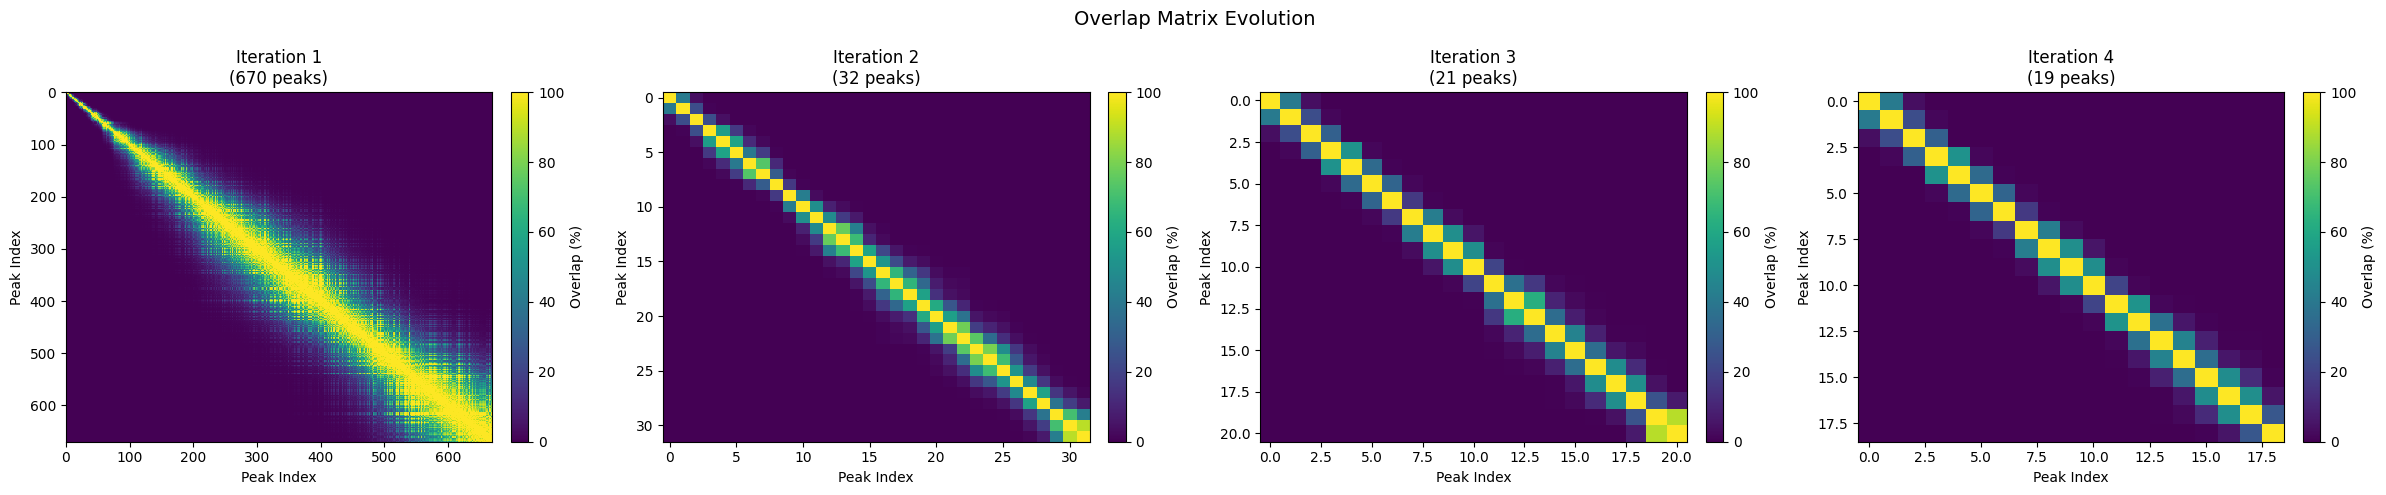

In [72]:
from plotUtils import plot_overlap_heatmaps

plot_overlap_heatmaps(clustering, 'all')

In [73]:
# Export the final Clusters
clustering["clustering"]["final_peaks"].to_csv("final_clusters_rotated.csv")